<a href="https://colab.research.google.com/github/cristiank1038/Proyecto_ML/blob/main/Proyecto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **calidad del agua**



1) Fuente de datos
* https://www.kaggle.com/datasets/adityakadiwal/water-potability

2) Breve descripción de datos
* realizar predicion de la calidad del agua


3) ¿Cuál es el objetivo?
* determinar si el agua es potable o no

4) ¿Este es un problema de clasificación o regresión?
* clasificación

5) ¿Cuántas características hay?
* total 10 columns

6) ¿Cuántas filas de datos hay?
* 3276  entries

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#abusso de niños
import pandas as pd
filename = '/content/drive/MyDrive/Codificación de Dojo-DS/semana 7 Modelos de clasificación/water_potability.csv'
df = pd.read_csv(filename)  #“df” (que significa “dataframe” o marco de datos)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
# eliminado las filas duplicadas
df.duplicated().sum()

0

#**identificado y abordado los valores faltantes**

procedmos a imputar esos valores faltantes con la media de cada una de esas columnas donde faltn datos

In [6]:

df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
# Rellenaremos la columna “ph”  de nuestro conjunto de datos con una mediana de dichos datos:
median_ph = df['ph'].median()
df['ph'].fillna(median_ph, inplace=True)

In [8]:
# Rellenaremos la columna “Sulfate”  de nuestro conjunto de datos con una mediana de dichos datos:
median_Sulfate = df['Sulfate'].median()
df['Sulfate'].fillna(median_Sulfate, inplace=True)

In [9]:
# Rellenaremos la columna “Trihalomethanes”  de nuestro conjunto de datos con una mediana de dichos datos:
median_Trihalomethanes = df['Trihalomethanes'].median()
df['Trihalomethanes'].fillna(median_Trihalomethanes, inplace=True)
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [10]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

## **producido visuales univariantes para el objetivo y todas las características**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


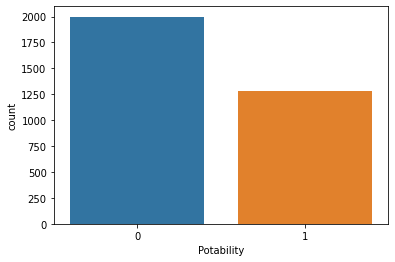

In [11]:
# Portability
import seaborn as sns
sns.countplot(df['Potability'])

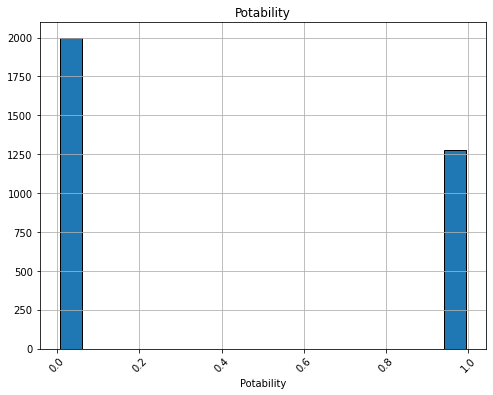

In [12]:
# grafifo de histogram de la columna Age
import matplotlib.pyplot as plt
df['Potability'].hist(bins = 15, figsize = (8,6), edgecolor='black', rwidth = 0.8)
plt.xlabel('Potability')
plt.title('Potability')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain') 
plt.show()

## **producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra**

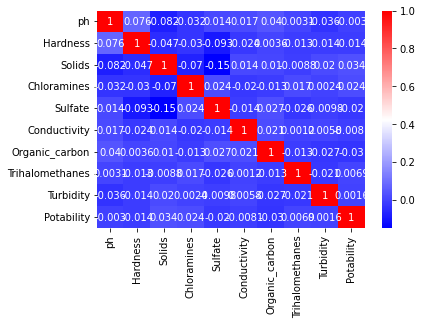

In [13]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'bwr', annot = True)

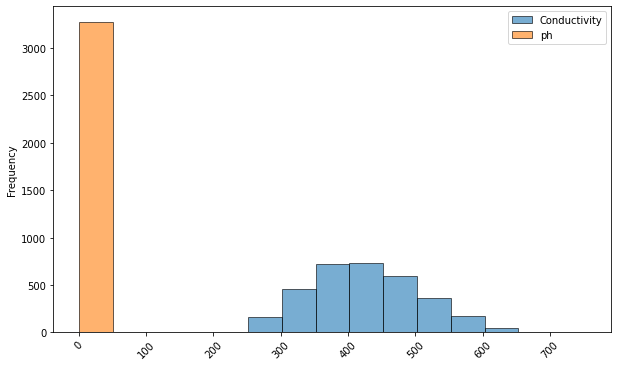

In [14]:
df[['Conductivity', 'ph']].plot.hist(bins = 15, edgecolor='black', figsize = (10, 6), alpha = 0.6)
plt.xticks(rotation = 45)
plt.show()

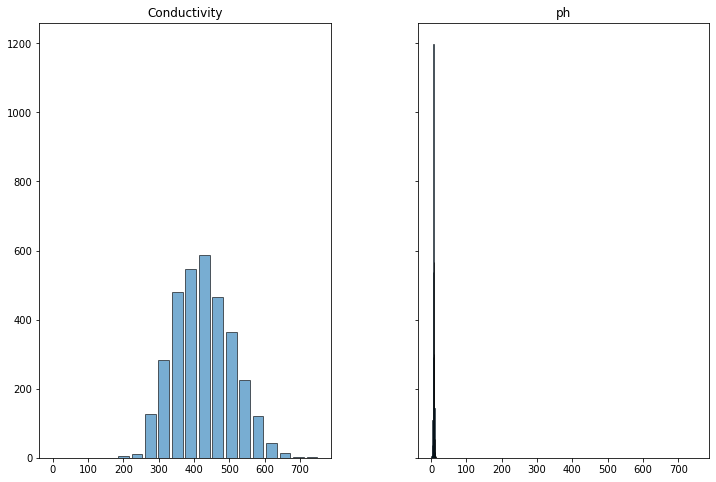

In [15]:
# si solo queremos ver el histograma de manera individual de cada variable
df[['Conductivity', 'ph']].hist(bins = 15, edgecolor='black', figsize = (12, 8), alpha = 0.6, grid = False, rwidth = 0.8, sharex = True, sharey = True ) #sharex = True, sharey = True
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [17]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [18]:
y = df['Potability']
X =df.drop(columns = 'Potability')

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [20]:
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2500,7.036752,202.569467,22256.950365,6.913501,304.951498,434.198436,13.696893,64.205667,4.478070
1044,5.319769,204.202072,22390.795566,8.053559,315.027505,399.119025,13.974085,83.157997,2.925732
415,7.350379,193.633367,26736.085567,10.416589,309.416883,557.495685,16.519722,61.077383,3.663922
2841,7.612517,225.492793,14812.970645,7.982595,356.690174,341.074925,14.994662,55.893916,2.939593
2567,7.122637,183.402648,31295.902410,4.425026,333.073546,411.616070,14.066057,77.185792,3.750447


In [21]:
from sklearn.preprocessing import StandardScaler
# instancien el escalador
scaler = StandardScaler()
# ajusten el escalador en los datos de entrenamiento
scaler.fit(X_train)

StandardScaler()

In [22]:
# transformen los datos de entrenamiento
train_scaled = scaler.transform(X_train)
# transformen los datos de prueba
test_scaled = scaler.transform(X_test)
# observen las 5 primeras filas de train_scaled
train_scaled[:5]

array([[-0.03160594,  0.18259841,  0.02138745, -0.12866674, -0.79878804,
         0.0936938 , -0.17061951, -0.14247522,  0.67463557],
       [-1.20758241,  0.23232669,  0.03650158,  0.59631836, -0.51880503,
        -0.33643593, -0.08624503,  1.05009143, -1.32667001],
       [ 0.18319981, -0.0895905 ,  0.52718228,  2.09901475, -0.67470794,
         1.60551547,  0.68862258, -0.33932104, -0.3749806 ],
       [ 0.36274027,  0.88083081, -0.81920481,  0.5511912 ,  0.63887975,
        -1.04814954,  0.224409  , -0.66548833, -1.30879957],
       [ 0.02721767, -0.40121279,  1.04208787, -1.71113559, -0.01735787,
        -0.18320216, -0.05824941,  0.67429318, -0.26343113]])

In [23]:
X_train_scaled = pd.DataFrame(train_scaled, columns=X_train.columns)
X_train_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.031606,0.182598,0.021387,-0.128667,-0.798788,0.093694,-0.170620,-0.142475,0.674636
1,-1.207582,0.232327,0.036502,0.596318,-0.518805,-0.336436,-0.086245,1.050091,-1.326670
2,0.183200,-0.089590,0.527182,2.099015,-0.674708,1.605515,0.688623,-0.339321,-0.374981
3,0.362740,0.880831,-0.819205,0.551191,0.638880,-1.048150,0.224409,-0.665488,-1.308800
4,0.027218,-0.401213,1.042088,-1.711136,-0.017358,-0.183202,-0.058249,0.674293,-0.263431


## **KNeighborsClassifier**

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)


In [32]:
scaler = StandardScaler()
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [33]:

# predecir los valores para el conjunto de prueba

predictions = knn_pipe.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [34]:
#evaluar el rendimiento del modelo en el conjunto de prueba

# calculen la exactitud de la clasificación
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.608058608058608

In [24]:
#importar modelo DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
# entrenar modelo
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [26]:
# predecir los valores objetivos para el conjunto de entrenamiento y de prueba
dec_tree.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [35]:
# calculen la exactitud de la clasificación
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

0.6198616198616199
0.6324786324786325
